# Omdena  - Milan Chapter Agrifoods
## AI for Sustainable agri-food systems: use of Satellite Imagery
### Tabular model for grapes and olives in Italy 2020-2021
#### Author: Maria Fisher 


The main objective of this study is to have gather information about crop production in Italy for the period of 2020-2021. 

Crop dataset used in this study was downloaded from the Italian National Institute of Statistics (Istat).



In [1]:
import warnings 
warnings.filterwarnings("ignore")

import os
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
import seaborn as sns 
import scipy 
import sklearn
import joblib
from sklearn import preprocessing

# Pre-processing data for modelling 

In [2]:
grapes_olives= pd.read_csv("grapes_olives_model2019-2021.csv")
grapes_olives

City                Type_crop  total_ha  production_tonnes  \
0       Ascoli Piceno             grapes-table     10.00             104.10   
1       Ascoli Piceno             grapes-table     10.00             104.10   
2       Ascoli Piceno             grapes-table     10.00             104.10   
3       Ascoli Piceno             grapes-table     10.00             104.10   
4       Ascoli Piceno             table olives     80.00             630.00   
...               ...                      ...       ...                ...   
3183  Pesaro e Urbino  grapes-wines(N-pdo/pgi)    543.00            5497.70   
3184  Pesaro e Urbino             other olives    787.00            1030.90   
3185  Pesaro e Urbino             other olives    787.00            1030.90   
3186  Pesaro e Urbino             other olives    787.00            1030.90   
3187  Pesaro e Urbino             other olives    787.00            1030.90   

      RH2M  T2M_MAX  T2M_MIN  GWETROOT       Type_fertilizer  \
0    70.80    25.01     7.65      0.60               organic   
1    70.80    25.01     7.65      0.60    nitrogen-potassium   
2    70.80    25.01     7.65      0.60  phosphorus-potassium   
3    70.80    25.01     7.65      0.60               organic   
4    70.80    25.01     7.65      0.60               organic   
...    ...      ...      ...       ...                   ...   
3183 72.33    22.53    11.08      0.67  phosphorus-potassium   
3184 72.33    22.53    11.08      0.67               organic   
3185 72.33    22.53    11.08      0.67               organic   
3186 72.33    22.53    11.08      0.67    nitrogen-potassium   
3187 72.33    22.53    11.08      0.67  phosphorus-potassium   

      Fertilizers_tonnes  
0                   6.00  
1                  37.00  
2                  51.00  
3                 806.00  
4                   6.00  
...                  ...  
3183                0.00  
3184                1.00  
3185             1172.00  
3186               12.00  
3187                0.00  

[3188 rows x 10 columns]

Check for correlation

In [3]:
# Compute the correlation matrix
corr_grapes_olives= grapes_olives.select_dtypes(include=[np.number]).corr()

In [4]:
corr_grapes_olives

total_ha  production_tonnes  RH2M  T2M_MAX  T2M_MIN  \
total_ha                1.00               0.58 -0.04     0.23     0.03   
production_tonnes       0.58               1.00 -0.14     0.16     0.15   
RH2M                   -0.04              -0.14  1.00    -0.56    -0.30   
T2M_MAX                 0.23               0.16 -0.56     1.00     0.23   
T2M_MIN                 0.03               0.15 -0.30     0.23     1.00   
GWETROOT               -0.15              -0.02  0.30    -0.48    -0.17   
Fertilizers_tonnes     -0.05              -0.01 -0.08    -0.01     0.01   

                    GWETROOT  Fertilizers_tonnes  
total_ha               -0.15               -0.05  
production_tonnes      -0.02               -0.01  
RH2M                    0.30               -0.08  
T2M_MAX                -0.48               -0.01  
T2M_MIN                -0.17                0.01  
GWETROOT                1.00                0.12  
Fertilizers_tonnes      0.12                1.00

<AxesSubplot: >

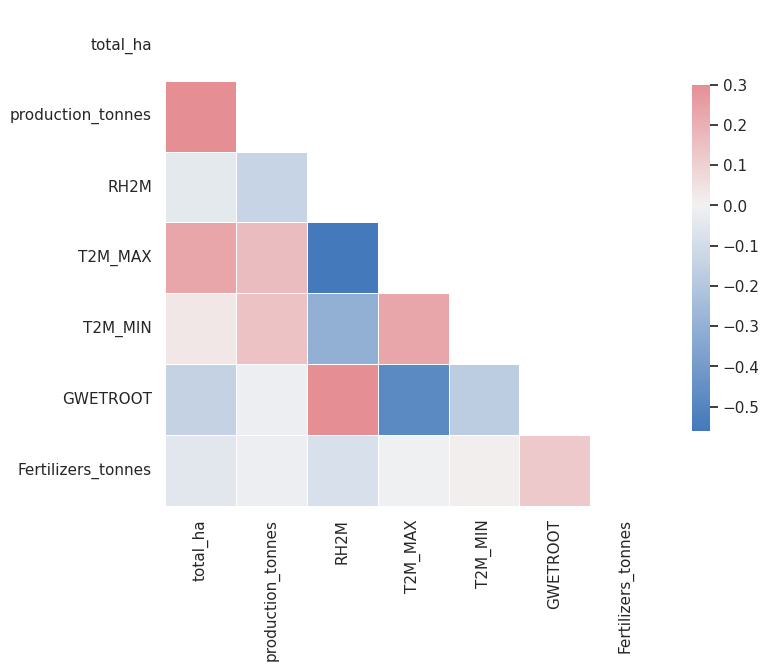

In [5]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle

mask = np.zeros_like(corr_grapes_olives, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_grapes_olives, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [6]:
# Instantiating the Scikit-Learn OHE object
sklearn_ohe = preprocessing.OneHotEncoder()
# Fitting the cat variables DataFrame to the Scikit-Learn one-hot encoder
sklearn_dummies = sklearn_ohe.fit_transform(grapes_olives[['City','Type_crop', 'Type_fertilizer']])

In [7]:
pd.DataFrame(data = sklearn_dummies.toarray())

0    1    2    3    4    5    6    7    8    9    ...  94   95   96   \
0    0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00  ... 1.00 0.00 0.00   
1    0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00  ... 1.00 0.00 0.00   
2    0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00  ... 1.00 0.00 0.00   
3    0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00  ... 1.00 0.00 0.00   
4    0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
3183 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 1.00 0.00   
3184 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   
3185 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   
3186 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   
3187 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00 0.00   

      97   98   99   100  101  102  103  
0    0.00 0.00 0.00 0.00 0.00 1.00 0.00  
1    0.00 0.00 0.00 0.00 1.00 0.00 0.00  
2    0.00 0.00 0.00 0.00 0.00 0.00 1.00  
3    0.00 0.00 0.00 0.00 0.00 1.00 0.00  
4    0.00 0.00 0.00 1.00 0.00 1.00 0.00  
...   ...  ...  ...  ...  ...  ...  ...  
3183 0.00 0.00 0.00 0.00 0.00 0.00 1.00  
3184 0.00 0.00 1.00 0.00 0.00 1.00 0.00  
3185 0.00 0.00 1.00 0.00 0.00 1.00 0.00  
3186 0.00 0.00 1.00 0.00 1.00 0.00 0.00  
3187 0.00 0.00 1.00 0.00 0.00 0.00 1.00  

[3188 rows x 104 columns]

In [8]:
sklearn_dummies_df = pd.DataFrame(data = sklearn_dummies.toarray(), 
                                  columns = [c for cat in sklearn_ohe.categories_ for c in cat])

In [9]:
joblib.dump(sklearn_ohe, 'grapes_olives_ohe.pkl')

['grapes_olives_ohe.pkl']

In [10]:
features = pd.concat([grapes_olives[['total_ha', 'RH2M', 'T2M_MAX', 'T2M_MIN', 'GWETROOT', 'Fertilizers_tonnes', 'production_tonnes']], sklearn_dummies_df], axis=1)

In [11]:
print(features)

      total_ha  RH2M  T2M_MAX  T2M_MIN  GWETROOT  Fertilizers_tonnes  \
0        10.00 70.80    25.01     7.65      0.60                6.00   
1        10.00 70.80    25.01     7.65      0.60               37.00   
2        10.00 70.80    25.01     7.65      0.60               51.00   
3        10.00 70.80    25.01     7.65      0.60              806.00   
4        80.00 70.80    25.01     7.65      0.60                6.00   
...        ...   ...      ...      ...       ...                 ...   
3183    543.00 72.33    22.53    11.08      0.67                0.00   
3184    787.00 72.33    22.53    11.08      0.67                1.00   
3185    787.00 72.33    22.53    11.08      0.67             1172.00   
3186    787.00 72.33    22.53    11.08      0.67               12.00   
3187    787.00 72.33    22.53    11.08      0.67                0.00   

      production_tonnes  Agrigento  Alessandria  Ancona  ...  grapes-table  \
0                104.10       0.00         0.00    0.00  

 
## Scaling Features

In [12]:
from sklearn.preprocessing import MinMaxScaler

y = features['production_tonnes']
X = features.drop('production_tonnes', axis=1)

scaler = MinMaxScaler()
features_no_prod = pd.DataFrame(scaler.fit_transform(X), index=y.index)
features_no_prod.columns = X.columns
features_no_prod.insert(len(features_no_prod.columns), 'production_tonnes', y)

data = features_no_prod


In [13]:
data.head()


total_ha  RH2M  T2M_MAX  T2M_MIN  GWETROOT  Fertilizers_tonnes  Agrigento  \
0      0.00  0.44     0.48     0.64      0.44                0.00       0.00   
1      0.00  0.44     0.48     0.64      0.44                0.02       0.00   
2      0.00  0.44     0.48     0.64      0.44                0.02       0.00   
3      0.00  0.44     0.48     0.64      0.44                0.34       0.00   
4      0.01  0.44     0.48     0.64      0.44                0.00       0.00   

   Alessandria  Ancona  Arezzo  ...  grapes-wines(N-pdo/pgi)  \
0         0.00    0.00    0.00  ...                     0.00   
1         0.00    0.00    0.00  ...                     0.00   
2         0.00    0.00    0.00  ...                     0.00   
3         0.00    0.00    0.00  ...                     0.00   
4         0.00    0.00    0.00  ...                     0.00   

   grapes-wines(Y-pdo)  grapes-wines(Y-pgi)  oil olives  other olives  \
0                 0.00                 0.00        0.00          0.00   
1                 0.00                 0.00        0.00          0.00   
2                 0.00                 0.00        0.00          0.00   
3                 0.00                 0.00        0.00          0.00   
4                 0.00                 0.00        0.00          0.00   

   table olives  nitrogen-potassium  organic  phosphorus-potassium  \
0          0.00                0.00     1.00                  0.00   
1          0.00                1.00     0.00                  0.00   
2          0.00                0.00     0.00                  1.00   
3          0.00                0.00     1.00                  0.00   
4          1.00                0.00     1.00                  0.00   

   production_tonnes  
0             104.10  
1             104.10  
2             104.10  
3             104.10  
4             630.00  

[5 rows x 111 columns]

Remove 10% of data for futher tests

In [14]:
data_model = data.sample(frac=0.9, random_state=786)
data_unseen = data.drop(data_model.index)

data_model.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data_model.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (2869, 111)
Unseen Data For Predictions: (319, 111)


Save unseen data for futher prediction test

In [15]:
data_unseen = data_unseen.to_csv('grapes_olives_ds_unseen.csv', index=False)

## Modelling

## Select best model

In [16]:
y = data_model['production_tonnes']
X = data_model.drop('production_tonnes', axis=1)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest

In [18]:
# Prepare the pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
import joblib

regressor_rf = make_pipeline(RandomForestRegressor(n_estimators = 200, random_state = 0))
regressor_rf.fit(X_train, y_train)


Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(n_estimators=200, random_state=0))])

In [19]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Predicting Cross Validation Score
crossval_rf = cross_val_score(estimator = regressor_rf, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))

# Print metrics
print('CV: ', crossval_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.9884738984435751
R2_score (train):  0.9984566641470812
R2_score (test):  0.9938646635555172
RMSE:  670.483725438069


CV:  0.9891105875775532

R2_score (train):  0.9989607952555453

R2_score (test):  0.990589516173015

RMSE:  614.6417225604372


In [20]:
print("Values before saving the model:",y_pred_rf_train)

Values before saving the model: [1.526356e+03 2.145598e+03 4.158222e+03 ... 4.147000e+00 6.831960e+02
 2.374250e+01]


Save the model

In [21]:
joblib.dump(regressor_rf, 'grapes_olives_rf.pkl')

['grapes_olives_rf.pkl']

Load the model

In [22]:
model_rf = joblib.load('grapes_olives_rf.pkl') 

In [23]:
print("Values after saving the model:",model_rf.predict(X_test))

Values after saving the model: [2.89888920e+04 1.33039900e+03 1.11433500e+02 9.24170000e+03
 7.16650000e+01 7.08506500e+03 9.89225000e+01 8.55939000e+02
 2.84283400e+03 1.24715350e+03 1.16670000e+01 3.80959000e+02
 2.63441600e+03 2.22296075e+04 1.22650000e+00 3.21550000e+00
 1.92175815e+04 5.33014000e+03 2.19920000e+01 6.21172000e+02
 9.70732450e+03 3.75445570e+04 1.27689250e+03 3.03970000e+01
 2.56123150e+03 2.72522925e+04 1.38962500e+04 7.06495000e+01
 9.09500000e+00 1.91518650e+03 2.52097000e+02 1.54448000e+02
 3.87570000e+02 7.80221800e+03 3.09589680e+04 3.13934000e+02
 1.30606250e+03 9.32059000e+02 3.77180000e+02 2.89539835e+04
 7.85589200e+03 9.87595000e+01 6.53970000e+03 7.63005000e+01
 3.01385000e+01 6.13920900e+03 2.61217200e+03 5.41400000e+00
 3.64723780e+04 2.38374700e+04 8.46585100e+03 5.02626500e+03
 1.30530450e+03 2.42890000e+01 4.95854750e+03 8.44064750e+03
 7.04915000e+01 5.87886000e+03 1.82491500e+02 1.68523310e+04
 4.61068700e+03 2.84705900e+03 7.99965000e+01 7.075858

In [24]:
result = model_rf.score(X_test, y_test)
print(result)

0.9938646635555172


Use the loaded model to make predictions with new data

In [25]:
# Predict on new dataset
pr = pd.read_csv('grapes_olives_ds_unseen.csv')
pred_cols = list(pr.columns.values)[:-1]

# Apply the pipeline to new data
pred = pd.Series(regressor_rf.predict(pr[pred_cols]))
print (pred)

0       622.10
1      8587.84
2     13203.94
3     16118.28
4     16155.20
        ...   
314     808.72
315    1288.50
316    1266.14
317    1282.09
318    1047.66
Length: 319, dtype: float64


Residuals versus predicted values for the random forest model

In [26]:
import dalex as dx
regressor_rf = dx.Explainer(regressor_rf, X, y)

Preparation of a new explainer is initiated

  -> data              : 2869 rows 110 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 2869 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7f35d38405e0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.141, mean = 6.03e+03, max = 4.38e+04
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -5.68e+03, mean = 13.9, max = 5.66e+03
  -> model_info        : package sklearn

A new explainer has been created!


In [27]:
md_rf = regressor_rf.model_diagnostics()
md_rf.result

total_ha  RH2M  T2M_MAX  T2M_MIN  GWETROOT  Fertilizers_tonnes  \
0         0.12  0.57     0.81     0.54      0.09                0.00   
1         0.03  0.81     0.62     0.36      0.74                0.18   
2         0.53  0.42     0.65     0.55      0.35                0.41   
3         0.15  0.51     0.44     0.28      0.62                0.00   
4         0.02  0.71     0.73     0.42      0.68                0.89   
...        ...   ...      ...      ...       ...                 ...   
2864      0.13  0.40     0.96     0.69      0.38                0.47   
2865      0.31  0.51     0.46     0.61      0.71                0.03   
2866      0.13  0.40     0.96     0.69      0.38                0.11   
2867      0.94  0.55     0.60     0.56      0.26                0.04   
2868      0.07  0.43     0.90     0.54      0.21                0.04   

      Agrigento  Alessandria  Ancona  Arezzo  ...  table olives  \
0          0.00         0.00    0.00    0.00  ...          0.00   
1          0.00         0.00    0.00    0.00  ...          0.00   
2          0.00         0.00    0.00    0.00  ...          0.00   
3          0.00         0.00    0.00    0.00  ...          0.00   
4          0.00         0.00    0.00    0.00  ...          0.00   
...         ...          ...     ...     ...  ...           ...   
2864       0.00         0.00    0.00    0.00  ...          0.00   
2865       0.00         0.00    0.00    0.00  ...          0.00   
2866       0.00         0.00    0.00    0.00  ...          0.00   
2867       0.00         0.00    0.00    0.00  ...          0.00   
2868       0.00         0.00    0.00    0.00  ...          0.00   

      nitrogen-potassium  organic  phosphorus-potassium        y    y_hat  \
0                   0.00     1.00                  0.00  2952.60  2948.09   
1                   0.00     1.00                  0.00  2798.00  2783.05   
2                   0.00     1.00                  0.00  5450.00  5462.38   
3                   0.00     0.00                  1.00 16708.00 16642.38   
4                   0.00     1.00                  0.00  3700.00  3602.05   
...                  ...      ...                   ...      ...      ...   
2864                0.00     1.00                  0.00  9200.00  8878.83   
2865                1.00     0.00                  0.00  8585.20  8596.51   
2866                0.00     0.00                  1.00  9200.00  8936.62   
2867                0.00     0.00                  1.00 31820.40 30958.97   
2868                0.00     0.00                  1.00  2034.80  2138.00   

      residuals  abs_residuals                  label   ids  
0          4.51           4.51  RandomForestRegressor     1  
1         14.95          14.95  RandomForestRegressor     2  
2        -12.38          12.38  RandomForestRegressor     3  
3         65.62          65.62  RandomForestRegressor     4  
4         97.95          97.95  RandomForestRegressor     5  
...         ...            ...                    ...   ...  
2864     321.17         321.17  RandomForestRegressor  2865  
2865     -11.31          11.31  RandomForestRegressor  2866  
2866     263.38         263.38  RandomForestRegressor  2867  
2867     861.43         861.43  RandomForestRegressor  2868  
2868    -103.20         103.20  RandomForestRegressor  2869  

[2869 rows x 116 columns]

In [28]:
md_rf.plot()

In [29]:
md_rf = regressor_rf.model_diagnostics()
md_rf.plot(variable = "y", yvariable = "y_hat")

### Gradient Boosting

In [30]:
# Prepare the pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
import joblib

regressor_gbr = make_pipeline(GradientBoostingRegressor(n_estimators = 200, random_state = 0))
regressor_gbr.fit(X_train, y_train)


Pipeline(steps=[('gradientboostingregressor',
                 GradientBoostingRegressor(n_estimators=200, random_state=0))])

In [31]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


# Predicting Cross Validation Score
crossval_gbr = cross_val_score(estimator = regressor_gbr, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_gbr_train = regressor_gbr.predict(X_train)
r2_score_gbr_train = r2_score(y_train, y_pred_gbr_train)

# Predicting R2 Score the Test set results
y_pred_gbr_test = regressor_gbr.predict(X_test)
r2_score_gbr_test = r2_score(y_test, y_pred_gbr_test)

# Predicting RMSE the Test set results
rmse_gbr = (np.sqrt(mean_squared_error(y_test, y_pred_gbr_test)))

# Print metrics
print('CV: ', crossval_gbr.mean())
print('R2_score (train): ', r2_score_gbr_train)
print('R2_score (test): ', r2_score_gbr_test)
print("RMSE: ", rmse_gbr)

CV:  0.9504968859827375
R2_score (train):  0.9666999448243798
R2_score (test):  0.9600681344895289
RMSE:  1710.522727678606


CV:  0.9616349702636591

R2_score (train):  0.9724990355268537

R2_score (test):  0.960273332552122

RMSE:  1262.8655856182372



In [32]:
print("Values before saving the model:",y_pred_gbr_train)

Values before saving the model: [1565.48805759 1836.55206306 4537.08972665 ... -880.2376458   751.59970888
 -264.18845628]


Save the model

In [33]:
joblib.dump(regressor_gbr, 'grapes_olives_gbr.pkl')

['grapes_olives_gbr.pkl']

Load the model

In [34]:
model_gbr = joblib.load('grapes_olives_gbr.pkl') 

In [35]:
print("Values after saving the model:",model_gbr.predict(X_test))

Values after saving the model: [ 3.19396538e+04  2.09299749e+03  1.31439943e+03  9.27563313e+03
  5.50366312e+02  4.91774248e+03 -8.55777642e+02  4.23748261e+02
  2.70841457e+03  9.07452267e+02  8.78908227e+02  3.30073379e+02
  2.12960946e+03  1.99279062e+04  2.26254448e+02 -5.11793526e+02
  1.19725221e+04  5.19221843e+03 -5.75786368e+02  1.20981884e+03
  9.66545725e+03  3.50778102e+04  1.66971572e+03  8.54004707e+02
  2.44335606e+03  2.32414133e+04  1.36855183e+04 -2.86149500e+02
  2.56894645e+02  1.34513340e+03  1.11098260e+03  7.51599709e+02
  9.93534038e+02  8.46850335e+03  2.51675459e+04  2.46009064e+03
  1.80849898e+03  9.26204841e+02  5.50366312e+02  3.17863280e+04
  8.44652319e+03  7.52407466e+02  7.23403238e+03 -7.51411626e+02
  4.85081620e+01  7.99951346e+03  2.00500731e+03 -7.94738078e+02
  3.39076125e+04  2.01065834e+04  8.30664303e+03  6.41880600e+03
  1.96049842e+03 -4.06260647e+02  4.09421570e+03  5.88959973e+03
 -2.86149500e+02  7.19159433e+03  5.58691745e+02  1.6180683

In [36]:
result = model_gbr.score(X_test, y_test)
print(result)

0.9600681344895289


Use the loaded model to make predictions with new data

In [37]:
# Predict on new dataset
pr = pd.read_csv('grapes_olives_ds_unseen.csv')
pred_cols = list(pr.columns.values)[:-1]

# Apply the pipeline to new data
pred = pd.Series(regressor_gbr.predict(pr[pred_cols]))
print (pred)

0       190.40
1     10441.98
2     12207.93
3     12912.03
4     12912.03
        ...   
314    2629.66
315    2045.42
316    2359.06
317    2045.42
318    1239.36
Length: 319, dtype: float64


In [38]:
import dalex as dx
regressor_gbr = dx.Explainer(regressor_gbr, X, y)

Preparation of a new explainer is initiated

  -> data              : 2869 rows 110 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 2869 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7f35d38405e0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -2.6e+03, mean = 6.04e+03, max = 4.17e+04
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -8.7e+03, mean = 5.22, max = 9.88e+03
  -> model_info        : package sklearn

A new explainer has been created!


In [39]:
md_gbr = regressor_gbr.model_diagnostics()
md_gbr.result

total_ha  RH2M  T2M_MAX  T2M_MIN  GWETROOT  Fertilizers_tonnes  \
0         0.12  0.57     0.81     0.54      0.09                0.00   
1         0.03  0.81     0.62     0.36      0.74                0.18   
2         0.53  0.42     0.65     0.55      0.35                0.41   
3         0.15  0.51     0.44     0.28      0.62                0.00   
4         0.02  0.71     0.73     0.42      0.68                0.89   
...        ...   ...      ...      ...       ...                 ...   
2864      0.13  0.40     0.96     0.69      0.38                0.47   
2865      0.31  0.51     0.46     0.61      0.71                0.03   
2866      0.13  0.40     0.96     0.69      0.38                0.11   
2867      0.94  0.55     0.60     0.56      0.26                0.04   
2868      0.07  0.43     0.90     0.54      0.21                0.04   

      Agrigento  Alessandria  Ancona  Arezzo  ...  table olives  \
0          0.00         0.00    0.00    0.00  ...          0.00   
1          0.00         0.00    0.00    0.00  ...          0.00   
2          0.00         0.00    0.00    0.00  ...          0.00   
3          0.00         0.00    0.00    0.00  ...          0.00   
4          0.00         0.00    0.00    0.00  ...          0.00   
...         ...          ...     ...     ...  ...           ...   
2864       0.00         0.00    0.00    0.00  ...          0.00   
2865       0.00         0.00    0.00    0.00  ...          0.00   
2866       0.00         0.00    0.00    0.00  ...          0.00   
2867       0.00         0.00    0.00    0.00  ...          0.00   
2868       0.00         0.00    0.00    0.00  ...          0.00   

      nitrogen-potassium  organic  phosphorus-potassium        y    y_hat  \
0                   0.00     1.00                  0.00  2952.60  4521.00   
1                   0.00     1.00                  0.00  2798.00  2710.45   
2                   0.00     1.00                  0.00  5450.00  6973.65   
3                   0.00     0.00                  1.00 16708.00 15706.35   
4                   0.00     1.00                  0.00  3700.00  2185.56   
...                  ...      ...                   ...      ...      ...   
2864                0.00     1.00                  0.00  9200.00  8632.42   
2865                1.00     0.00                  0.00  8585.20 11670.11   
2866                0.00     0.00                  1.00  9200.00  8507.87   
2867                0.00     0.00                  1.00 31820.40 25167.55   
2868                0.00     0.00                  1.00  2034.80  2724.76   

      residuals  abs_residuals                      label   ids  
0      -1568.40        1568.40  GradientBoostingRegressor     1  
1         87.55          87.55  GradientBoostingRegressor     2  
2      -1523.65        1523.65  GradientBoostingRegressor     3  
3       1001.65        1001.65  GradientBoostingRegressor     4  
4       1514.44        1514.44  GradientBoostingRegressor     5  
...         ...            ...                        ...   ...  
2864     567.58         567.58  GradientBoostingRegressor  2865  
2865   -3084.91        3084.91  GradientBoostingRegressor  2866  
2866     692.13         692.13  GradientBoostingRegressor  2867  
2867    6652.85        6652.85  GradientBoostingRegressor  2868  
2868    -689.96         689.96  GradientBoostingRegressor  2869  

[2869 rows x 116 columns]

In [40]:
md_gbr.plot()

In [41]:
md_gbr = regressor_gbr.model_diagnostics()
md_gbr.plot(variable = "y", yvariable = "y_hat")

### Decision Tree

In [42]:
# Prepare the pipeline
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
import joblib

regressor_dt = make_pipeline( DecisionTreeRegressor())
regressor_dt.fit(X_train, y_train)

Pipeline(steps=[('decisiontreeregressor', DecisionTreeRegressor())])

In [43]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Predicting Cross Validation Score

# Predicting Cross Validation Score
crossval_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))

# Print metrics
print('CV: ', crossval_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.9788238988433484
R2_score (train):  1.0
R2_score (test):  0.9998448269441674
RMSE:  106.62945894863877


CV:  0.9862913572428879

R2_score (train):  1.0

R2_score (test):  0.9900320150787043

RMSE:  632.5862490926847



In [44]:
print("Values before saving the model:",y_pred_dt_train)

Values before saving the model: [1.5440e+03 2.1600e+03 4.1515e+03 ... 2.6000e+00 7.0000e+02 2.4000e+01]


Save the model

In [45]:
joblib.dump(regressor_dt, 'grapes_olives_dt.pkl')

['grapes_olives_dt.pkl']

Load the model

In [46]:
model_dt = joblib.load('grapes_olives_dt.pkl') 

In [47]:
print("Values after saving the model:",model_dt.predict(X_test))

Values after saving the model: [2.95000e+04 1.24460e+03 7.65000e+01 9.30000e+03 7.60000e+01 6.45000e+03
 9.90000e+01 8.60000e+02 2.95500e+03 1.25200e+03 1.14000e+01 3.77000e+02
 3.20960e+03 2.20000e+04 1.00000e+00 3.60000e+00 2.04000e+04 5.32000e+03
 2.20000e+01 6.16000e+02 6.38000e+03 3.85000e+04 1.24000e+03 2.70000e+01
 2.72010e+03 2.76377e+04 1.39000e+04 7.19000e+01 9.00000e+00 1.88430e+03
 2.60000e+02 1.55000e+02 3.87700e+02 7.67000e+03 3.18204e+04 2.64500e+02
 1.27000e+03 9.12400e+02 3.77000e+02 2.95000e+04 7.54500e+03 4.00000e+01
 6.53000e+03 4.70000e+01 3.00000e+01 6.00000e+03 3.20960e+03 3.20000e+00
 3.80100e+04 2.43000e+04 8.70000e+03 4.95400e+03 1.24460e+03 2.20000e+01
 5.18140e+03 8.91500e+03 7.19000e+01 5.80000e+03 1.40000e+02 1.84320e+04
 4.55790e+03 2.95500e+03 9.00000e+01 5.70540e+03 7.60000e+01 6.75000e+03
 6.55500e+02 3.00000e+00 1.60400e+04 2.50000e+04 1.32000e+01 2.46400e+03
 1.26000e+04 2.98700e+02 1.10000e+02 2.55500e+03 7.88000e+03 1.70000e+04
 4.90000e+01 2.05020

In [48]:
result = model_dt.score(X_test, y_test)
print(result)

0.9998448269441674


Use the loaded model to make predictions with new data

In [49]:
# Predict on new dataset
pr = pd.read_csv('grapes_olives_ds_unseen.csv')
pred_cols = list(pr.columns.values)[:-1]

# Apply the pipeline to new data
pred = pd.Series(regressor_dt.predict(pr[pred_cols]))
print (pred)

0       630.00
1      8585.20
2     13178.50
3     16439.20
4     16439.20
        ...   
314     712.00
315    1030.90
316    1030.90
317    1030.90
318    1058.30
Length: 319, dtype: float64


In [50]:
import dalex as dx
regressor_dt = dx.Explainer(regressor_dt, X, y)

Preparation of a new explainer is initiated

  -> data              : 2869 rows 110 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 2869 values
  -> model_class       : sklearn.tree._classes.DecisionTreeRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7f35d38405e0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.1, mean = 6.05e+03, max = 4.5e+04
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -4.29e+02, mean = 1.62, max = 1.93e+03
  -> model_info        : package sklearn

A new explainer has been created!


In [51]:
md_dt = regressor_dt.model_diagnostics()
md_dt.result

total_ha  RH2M  T2M_MAX  T2M_MIN  GWETROOT  Fertilizers_tonnes  \
0         0.12  0.57     0.81     0.54      0.09                0.00   
1         0.03  0.81     0.62     0.36      0.74                0.18   
2         0.53  0.42     0.65     0.55      0.35                0.41   
3         0.15  0.51     0.44     0.28      0.62                0.00   
4         0.02  0.71     0.73     0.42      0.68                0.89   
...        ...   ...      ...      ...       ...                 ...   
2864      0.13  0.40     0.96     0.69      0.38                0.47   
2865      0.31  0.51     0.46     0.61      0.71                0.03   
2866      0.13  0.40     0.96     0.69      0.38                0.11   
2867      0.94  0.55     0.60     0.56      0.26                0.04   
2868      0.07  0.43     0.90     0.54      0.21                0.04   

      Agrigento  Alessandria  Ancona  Arezzo  ...  table olives  \
0          0.00         0.00    0.00    0.00  ...          0.00   
1          0.00         0.00    0.00    0.00  ...          0.00   
2          0.00         0.00    0.00    0.00  ...          0.00   
3          0.00         0.00    0.00    0.00  ...          0.00   
4          0.00         0.00    0.00    0.00  ...          0.00   
...         ...          ...     ...     ...  ...           ...   
2864       0.00         0.00    0.00    0.00  ...          0.00   
2865       0.00         0.00    0.00    0.00  ...          0.00   
2866       0.00         0.00    0.00    0.00  ...          0.00   
2867       0.00         0.00    0.00    0.00  ...          0.00   
2868       0.00         0.00    0.00    0.00  ...          0.00   

      nitrogen-potassium  organic  phosphorus-potassium        y    y_hat  \
0                   0.00     1.00                  0.00  2952.60  2952.60   
1                   0.00     1.00                  0.00  2798.00  2798.00   
2                   0.00     1.00                  0.00  5450.00  5450.00   
3                   0.00     0.00                  1.00 16708.00 16708.00   
4                   0.00     1.00                  0.00  3700.00  3700.00   
...                  ...      ...                   ...      ...      ...   
2864                0.00     1.00                  0.00  9200.00  9200.00   
2865                1.00     0.00                  0.00  8585.20  8585.20   
2866                0.00     0.00                  1.00  9200.00  9200.00   
2867                0.00     0.00                  1.00 31820.40 31820.40   
2868                0.00     0.00                  1.00  2034.80  2034.80   

      residuals  abs_residuals                  label   ids  
0          0.00           0.00  DecisionTreeRegressor     1  
1          0.00           0.00  DecisionTreeRegressor     2  
2          0.00           0.00  DecisionTreeRegressor     3  
3          0.00           0.00  DecisionTreeRegressor     4  
4          0.00           0.00  DecisionTreeRegressor     5  
...         ...            ...                    ...   ...  
2864       0.00           0.00  DecisionTreeRegressor  2865  
2865       0.00           0.00  DecisionTreeRegressor  2866  
2866       0.00           0.00  DecisionTreeRegressor  2867  
2867       0.00           0.00  DecisionTreeRegressor  2868  
2868       0.00           0.00  DecisionTreeRegressor  2869  

[2869 rows x 116 columns]

In [52]:
md_dt.plot()

In [53]:
md_dt = regressor_dt.model_diagnostics()
md_dt.plot(variable = "y", yvariable = "y_hat")

### K Neighbors 

In [54]:
# Prepare the pipeline
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
import joblib

regressor_knn = make_pipeline(  KNeighborsRegressor(n_neighbors=5))
regressor_knn.fit(X_train, y_train)

Pipeline(steps=[('kneighborsregressor', KNeighborsRegressor())])

In [55]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Predicting Cross Validation Score
crossval_knn = cross_val_score(estimator = regressor_knn, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_knn_train = regressor_knn.predict(X_train)
r2_score_knn_train = r2_score(y_train, y_pred_knn_train)

# Predicting R2 Score the Test set results
y_pred_knn_test = regressor_knn.predict(X_test)
r2_score_knn_test = r2_score(y_test, y_pred_knn_test)

# Predicting RMSE the Test set results
rmse_knn = (np.sqrt(mean_squared_error(y_test, y_pred_knn_test)))

# Print metrics
print('CV: ', crossval_knn.mean())
print('R2_score (train): ', r2_score_knn_train)
print('R2_score (test): ', r2_score_knn_test)
print("RMSE: ", rmse_knn)

CV:  0.8067717451585141
R2_score (train):  0.9009796234595091
R2_score (test):  0.8647145182833569
RMSE:  3148.4343743576637


CV:  0.9070828384183001

R2_score (train):  0.9524512553705786

R2_score (test):  0.9202745373800134

RMSE:  1789.0174841968817



In [56]:
print("Values before saving the model:",y_pred_knn_train)

Values before saving the model: [7235.2  2177.7  2483.02 ...  407.56  924.46 1886.84]


Save the model

In [57]:
joblib.dump(regressor_knn, 'grapes_olives_knn.pkl')

['grapes_olives_knn.pkl']

Load the model

In [58]:
model_knn = joblib.load('grapes_olives_knn.pkl') 

In [59]:
print("Values after saving the model:",model_knn.predict(X_test))

Values after saving the model: [3.064000e+04 7.671400e+02 2.664980e+03 7.784000e+03 4.422600e+02
 8.237600e+03 2.538200e+03 1.460000e+03 2.641000e+03 8.355000e+02
 2.547000e+02 2.465800e+02 4.511860e+03 1.820400e+04 1.634200e+03
 4.265000e+02 1.606480e+04 6.370500e+03 1.720000e+01 5.843800e+02
 9.792000e+03 2.426520e+04 9.035200e+02 1.491260e+03 4.448120e+03
 2.508466e+04 1.386000e+04 3.202560e+03 2.669180e+03 2.072060e+03
 2.904800e+02 1.669940e+03 2.833800e+02 1.012800e+04 2.490450e+04
 2.694440e+03 8.716000e+03 6.784600e+02 2.465800e+02 3.064000e+04
 6.488800e+03 2.255000e+02 6.868000e+03 3.754800e+03 2.840000e+01
 6.440000e+03 5.002620e+03 2.573800e+02 2.983200e+04 1.960000e+04
 6.030000e+03 4.948600e+03 1.927340e+03 1.886840e+03 3.556260e+03
 6.821860e+03 1.385100e+03 5.800000e+03 4.420000e+01 1.003580e+04
 3.270960e+03 2.798000e+03 5.241000e+02 4.705020e+03 4.409800e+02
 6.490400e+03 2.436200e+02 3.430000e+01 1.876000e+04 2.523772e+04
 5.376000e+02 1.091340e+03 1.113200e+04 3.926

In [60]:
result = model_knn.score(X_test, y_test)
print(result)

0.8647145182833569


Use the loaded model to make predictions with new data

In [61]:
# Predict on new dataset
pr = pd.read_csv('grapes_olives_ds_unseen.csv')
pred_cols = list(pr.columns.values)[:-1]

# Apply the pipeline to new data
pred = pd.Series(regressor_knn.predict(pr[pred_cols]))
print (pred)

0       343.82
1     10156.00
2     10359.54
3     14711.50
4     12645.46
        ...   
314     712.00
315    2179.02
316    2179.02
317    2184.50
318    1307.58
Length: 319, dtype: float64


In [62]:
import dalex as dx
regressor_knn = dx.Explainer(regressor_knn, X, y)

Preparation of a new explainer is initiated

  -> data              : 2869 rows 110 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 2869 values
  -> model_class       : sklearn.neighbors._regression.KNeighborsRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7f35d38405e0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 2.52, mean = 5.83e+03, max = 3.86e+04
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.28e+04, mean = 2.15e+02, max = 2.61e+04
  -> model_info        : package sklearn

A new explainer has been created!


In [63]:
md_knn = regressor_knn.model_diagnostics()
md_knn.result

total_ha  RH2M  T2M_MAX  T2M_MIN  GWETROOT  Fertilizers_tonnes  \
0         0.12  0.57     0.81     0.54      0.09                0.00   
1         0.03  0.81     0.62     0.36      0.74                0.18   
2         0.53  0.42     0.65     0.55      0.35                0.41   
3         0.15  0.51     0.44     0.28      0.62                0.00   
4         0.02  0.71     0.73     0.42      0.68                0.89   
...        ...   ...      ...      ...       ...                 ...   
2864      0.13  0.40     0.96     0.69      0.38                0.47   
2865      0.31  0.51     0.46     0.61      0.71                0.03   
2866      0.13  0.40     0.96     0.69      0.38                0.11   
2867      0.94  0.55     0.60     0.56      0.26                0.04   
2868      0.07  0.43     0.90     0.54      0.21                0.04   

      Agrigento  Alessandria  Ancona  Arezzo  ...  table olives  \
0          0.00         0.00    0.00    0.00  ...          0.00   
1          0.00         0.00    0.00    0.00  ...          0.00   
2          0.00         0.00    0.00    0.00  ...          0.00   
3          0.00         0.00    0.00    0.00  ...          0.00   
4          0.00         0.00    0.00    0.00  ...          0.00   
...         ...          ...     ...     ...  ...           ...   
2864       0.00         0.00    0.00    0.00  ...          0.00   
2865       0.00         0.00    0.00    0.00  ...          0.00   
2866       0.00         0.00    0.00    0.00  ...          0.00   
2867       0.00         0.00    0.00    0.00  ...          0.00   
2868       0.00         0.00    0.00    0.00  ...          0.00   

      nitrogen-potassium  organic  phosphorus-potassium        y    y_hat  \
0                   0.00     1.00                  0.00  2952.60  2952.60   
1                   0.00     1.00                  0.00  2798.00  2199.40   
2                   0.00     1.00                  0.00  5450.00  5882.00   
3                   0.00     0.00                  1.00 16708.00 13834.40   
4                   0.00     1.00                  0.00  3700.00  3636.88   
...                  ...      ...                   ...      ...      ...   
2864                0.00     1.00                  0.00  9200.00  3390.00   
2865                1.00     0.00                  0.00  8585.20 14183.92   
2866                0.00     0.00                  1.00  9200.00  4890.00   
2867                0.00     0.00                  1.00 31820.40 24904.50   
2868                0.00     0.00                  1.00  2034.80  1958.54   

      residuals  abs_residuals                label   ids  
0          0.00           0.00  KNeighborsRegressor     1  
1        598.60         598.60  KNeighborsRegressor     2  
2       -432.00         432.00  KNeighborsRegressor     3  
3       2873.60        2873.60  KNeighborsRegressor     4  
4         63.12          63.12  KNeighborsRegressor     5  
...         ...            ...                  ...   ...  
2864    5810.00        5810.00  KNeighborsRegressor  2865  
2865   -5598.72        5598.72  KNeighborsRegressor  2866  
2866    4310.00        4310.00  KNeighborsRegressor  2867  
2867    6915.90        6915.90  KNeighborsRegressor  2868  
2868      76.26          76.26  KNeighborsRegressor  2869  

[2869 rows x 116 columns]

In [64]:
md_knn.plot()

In [65]:
md_knn = regressor_knn.model_diagnostics()
md_knn.plot(variable = "y", yvariable = "y_hat")

# Evaluate models 

In [66]:
models = [('Gradient Boosting Regressor', rmse_gbr, r2_score_gbr_train,r2_score_gbr_test, crossval_gbr.mean()),
          ('Random Forest Regressor', rmse_rf, r2_score_rf_train,r2_score_rf_test,crossval_rf.mean()),
          ('K Neighbors Regressor', rmse_knn, r2_score_knn_train,r2_score_knn_test,crossval_knn.mean()),
          ('Decision Tree Regressor', rmse_dt, r2_score_dt_train,r2_score_dt_test, crossval_dt.mean()) 
         ]

In [67]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R² Score(training)', 'R² Score(test)', 'Cross-Validation'])
predict

Model    RMSE  R² Score(training)  R² Score(test)  \
0  Gradient Boosting Regressor 1710.52                0.97            0.96   
1      Random Forest Regressor  670.48                1.00            0.99   
2        K Neighbors Regressor 3148.43                0.90            0.86   
3      Decision Tree Regressor  106.63                1.00            1.00   

   Cross-Validation  
0              0.95  
1              0.99  
2              0.81  
3              0.98

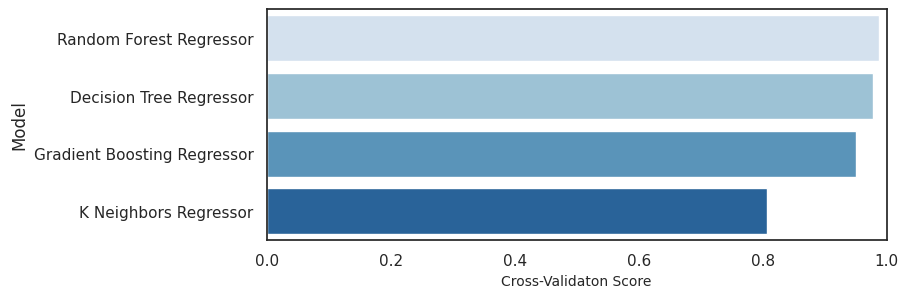

In [68]:
f, axe = plt.subplots(1,1, figsize=(8,3))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, palette='Blues',ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=10)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

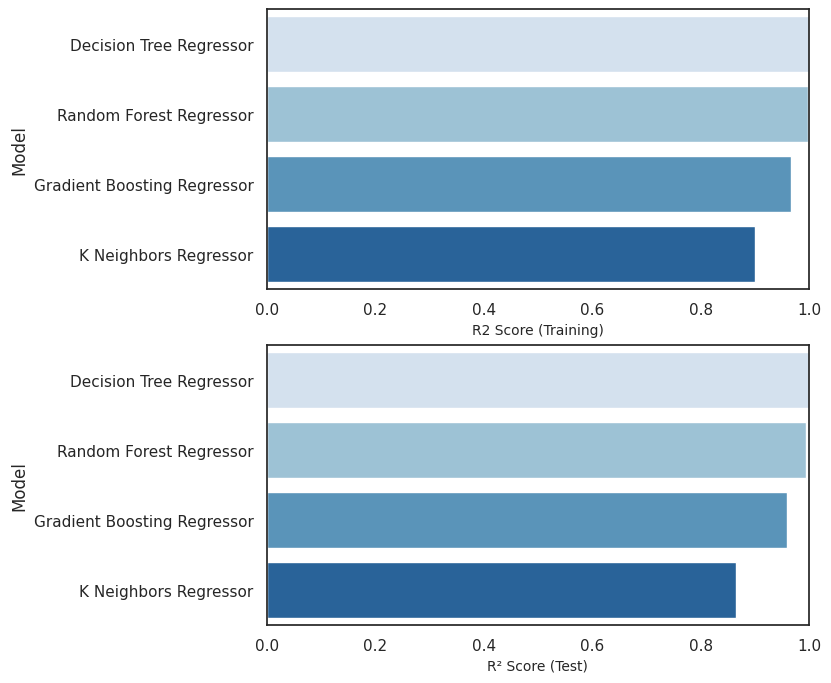

In [69]:
f, axes = plt.subplots(2,1, figsize=(7,8))

predict.sort_values(by=['R² Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R² Score(training)', y='Model', data = predict, palette='Blues', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=10)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R² Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R² Score(test)', y='Model', data = predict, palette='Blues', ax = axes[1])
axes[1].set_xlabel('R² Score (Test)', size=10)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

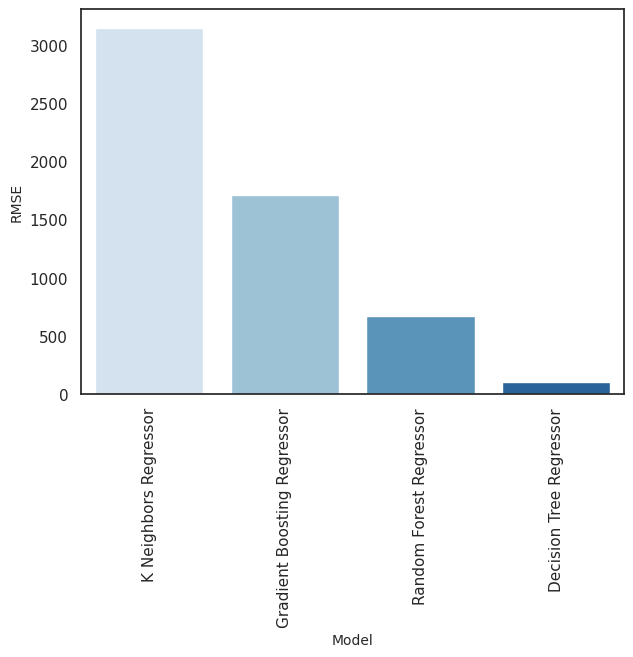

In [70]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots( figsize=(7,5))
sns.barplot(x='Model', y='RMSE', data=predict, palette='Blues',ax = axe)
axe.set_xlabel('Model', size=10)
axe.set_ylabel('RMSE', size=10)
plt.xticks(rotation= 90)
plt.show()

The models Random Forest Regressor and Decision Tree have better performance. 

# References


http://dati.istat.it

https://maps.princeton.edu/catalog/stanford-mn871sp9778

https://www.crea.gov.it/documents/68457/0/ITACONTA+2020_ENG+DEF+xweb+%281%29.pdf/95c6b30a-1e18-8e94-d4ac-ce884aef76e8?t=1619527317576

https://seaborn.pydata.org/generated/seaborn.relplot.html

https://www.statisticshowto.com/variance-inflation-factor/

https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

https://lost-stats.github.io/Presentation/Figures/heatmap_colored_correlation_matrix.html

https://plotly.com/python/box-plots/

https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html